In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
import SimpleITK as sitk

from scipy.ndimage import gaussian_filter

In [2]:
from dataset.utils import get_padded_mask

In [3]:
data_folder = r"..\data\HRpQCT_aim\numpy"

In [4]:
def load_sample(path):
    yaml_path = os.path.join(path, "image_stats.yaml")
    with open(yaml_path, 'r') as stream:
        try:
            image_stats = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    files = os.listdir(path)
    image = [f for f in files if f.endswith("image.npy")][0]
    image = np.expand_dims( np.load(os.path.join(path, image)), axis=0)
    mask = [f for f in files if f.endswith("outer.npy")][0]
    mask = np.load(os.path.join(path, mask))
    outer_offset = image_stats["outer_offset"]
    mask = get_padded_mask(mask, image.shape, outer_offset)
    
    # if path.endswith("m") or path.endswith("m"):
    trab_mask = [f for f in files if f.endswith("trabecular.npy")][0]
    trab_mask = np.load(os.path.join(path, trab_mask))
    trabecular_offset = image_stats["trabecular_offset"]
    trab_mask = get_padded_mask(trab_mask, image.shape, trabecular_offset)

    cort_mask = [f for f in files if f.endswith("cortical.npy")][0]
    cort_mask = np.load(os.path.join(path, cort_mask))
    cortial_offset = image_stats["cortical_offset"]
    cort_mask = get_padded_mask(cort_mask, image.shape, cortial_offset)
    image = image.squeeze()
    mask = mask.squeeze()
    trab_mask = trab_mask.squeeze()
    cort_mask = cort_mask.squeeze()
    return image, mask, trab_mask, cort_mask
    # else:
    #     image = image.squeeze()
    #     mask = mask.squeeze()
    #     return image, mask, None, None
    

-8e-07


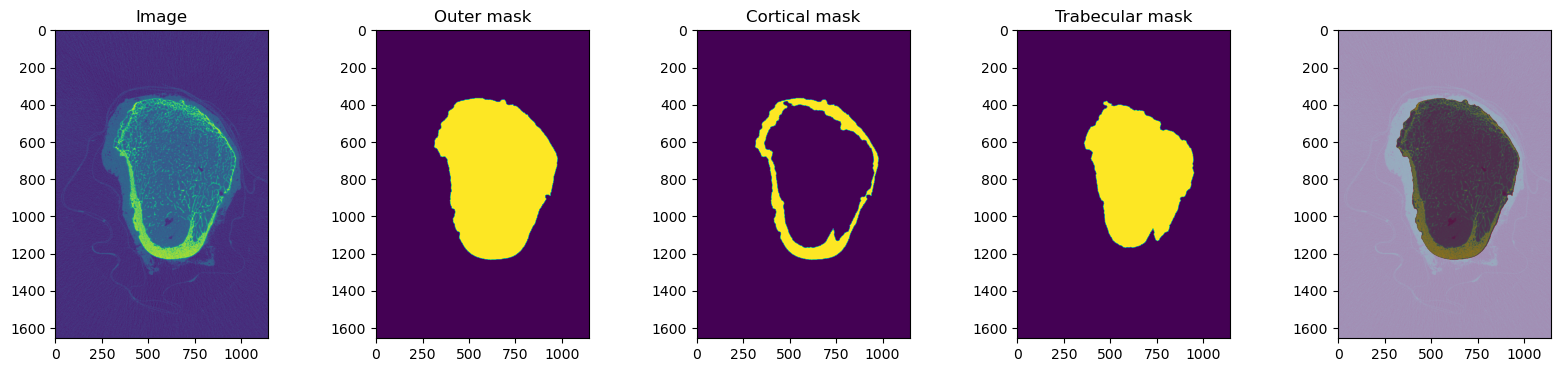

In [6]:
image, outer_mask, trabecular_mask, cortical_mask = load_sample(os.path.join(data_folder, "flowbone_2208_04835_r__p"))
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].imshow(image[0, :, :])
ax[0].set_title("Image")
ax[1].imshow(outer_mask[0, :, :])
ax[1].set_title("Outer mask")
ax[2].imshow(cortical_mask[0, :, :])
ax[2].set_title("Cortical mask")
ax[3].imshow(trabecular_mask[0, :, :])
ax[3].set_title("Trabecular mask")
ax[4].imshow(image[0, :, :])
ax[4].imshow(outer_mask[0, :, :], alpha=0.5, cmap="Reds")
print(np.mean(image))

# ax[5].imshow(image[0, :, :])
# ax[5].imshow(cortical_mask[0, :, :], alpha=0.5, cmap="Greens")
# ax[5].imshow(trabecular_mask[0, :, :], alpha=0.5, cmap="Blues")

plt.show()

In [5]:
def create_trab_mask(image, trab_mask):
    # trab_mask = image * trab_mask
    trab_mask = image.astype(np.float32)
    trab_mask = gaussian_filter(trab_mask, sigma=[0.8,0.8,0.8])
    trab_mask = trab_mask > 1.4 # or 1.5
    return trab_mask

In [6]:
def plot_slices(image, trab_mask):
    for i in range(0, trab_mask.shape[0], 50):
        ax, fig = plt.subplots(1, 2, figsize=(10, 5))
        fig[0].imshow(image[i, :, :])
        fig[0].set_title("Image")
        fig[1].imshow(trab_mask[i, :, :])
        fig[1].set_title("Trabecular mask")
        plt.show()

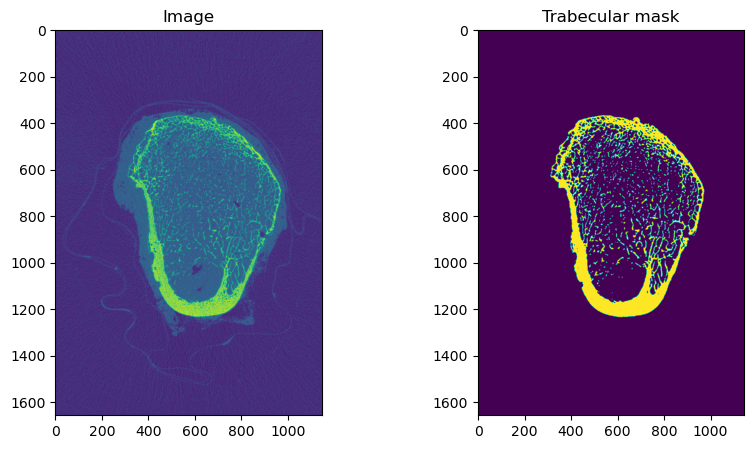

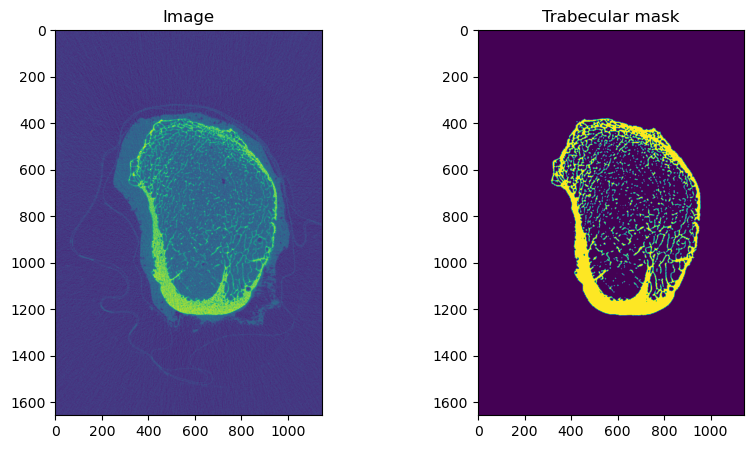

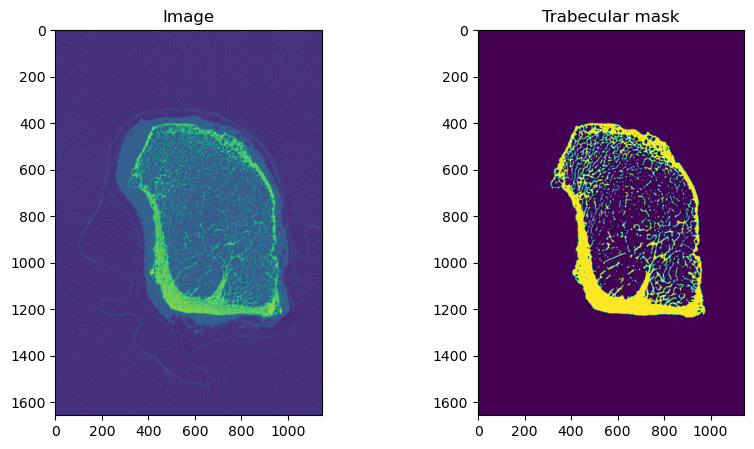

In [12]:
# Plot trabecular mask
image, outer_mask, trabecular_mask, cortical_mask = load_sample(os.path.join(data_folder, "flowbone_2208_04835_r__p"))

trab_mask = create_trab_mask(image, trabecular_mask)
plot_slices(image, trab_mask)


In [13]:
#s_image = sitk.GetImageFromArray(image.astype(np.float32))
s_trab_mask = sitk.GetImageFromArray(trab_mask.astype(np.float32))
#sitk.WriteImage(s_image, r"./flowbone_2208_04835_r__p_image.nii.gz")
sitk.WriteImage(s_trab_mask, r"./flowbone_2208_04835_r__p_mask_1_5.nii.gz")

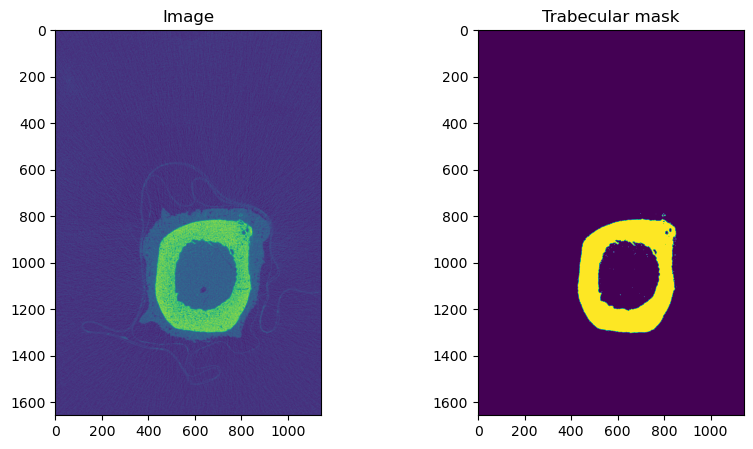

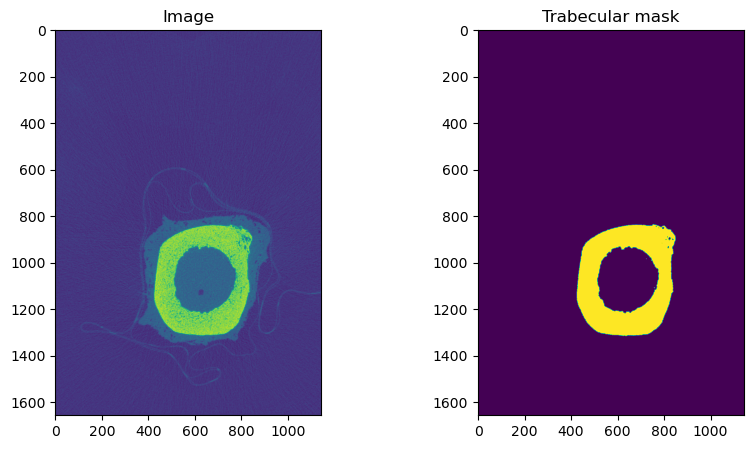

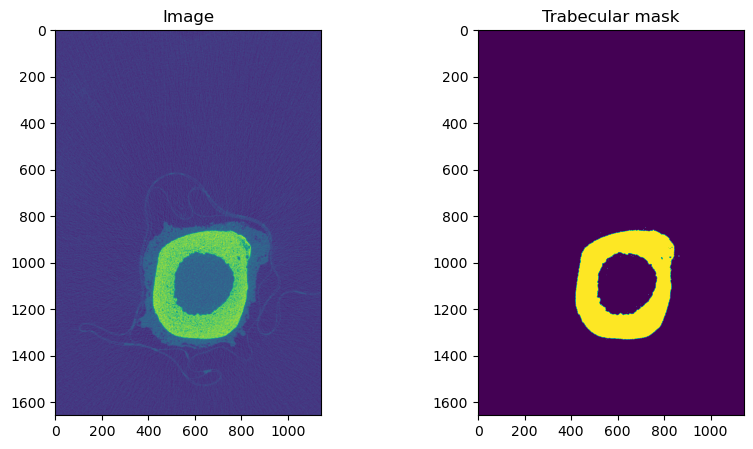

In [14]:
# For another sample
image, outer_mask, trabecular_mask, cortical_mask = load_sample(os.path.join(data_folder, "flowbone_2208_04835_r__m"))
trab_mask = create_trab_mask(image, trabecular_mask)
plot_slices(image, trab_mask)

In [15]:
#s_image = sitk.GetImageFromArray(image.astype(np.float32))
s_trab_mask = sitk.GetImageFromArray(trab_mask.astype(np.float32))
#sitk.WriteImage(s_image, r"./flowbone_2208_04835_r__m_image.nii.gz")
sitk.WriteImage(s_trab_mask, r"./flowbone_2208_04835_r__m_mask_1_5.nii.gz")

Shape mismatch: flowbone_2209_05992_l__m (149, 552, 565) (150, 1591, 1140) in mask 2209_05992_cortical.npy


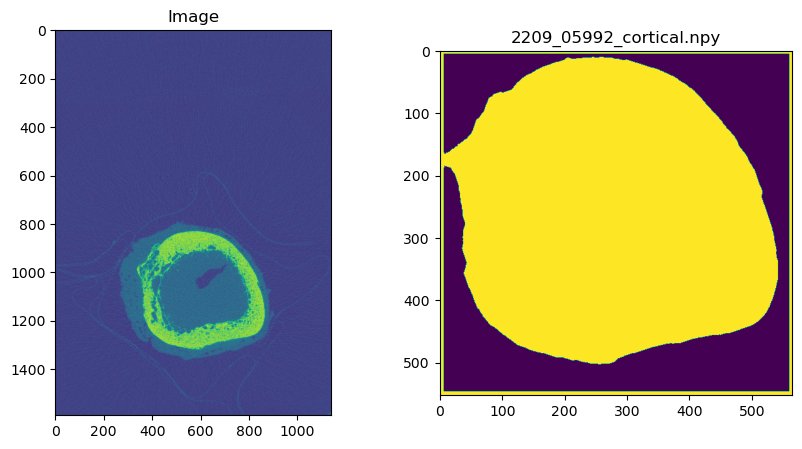

Shape mismatch: flowbone_2210_06147_l__m (149, 694, 562) (150, 1692, 1042) in mask 2210_06147_cortical.npy


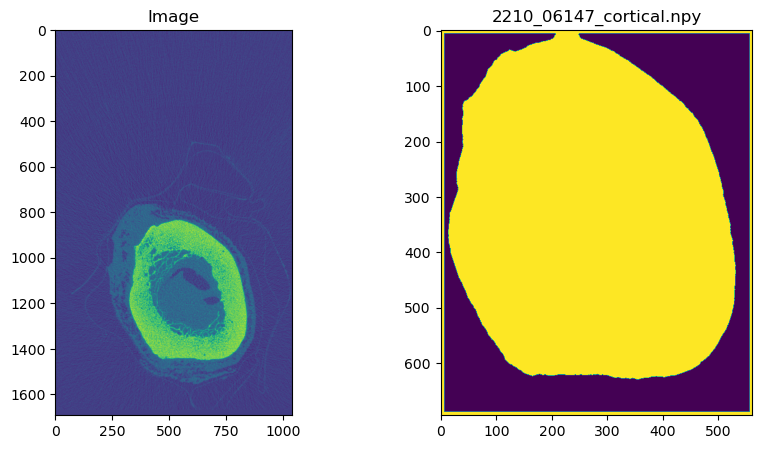

Shape mismatch: flowbone_2210_06147_l__p (146, 1111, 781) (150, 1669, 1036) in mask 2210_06147_cortical.npy


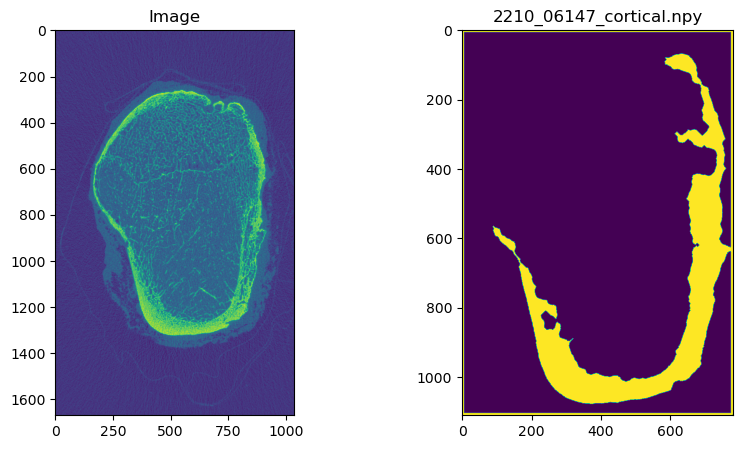

Shape mismatch: flowbone_2210_06283_r__m (149, 541, 513) (150, 845, 842) in mask 2210_06283_cortical.npy


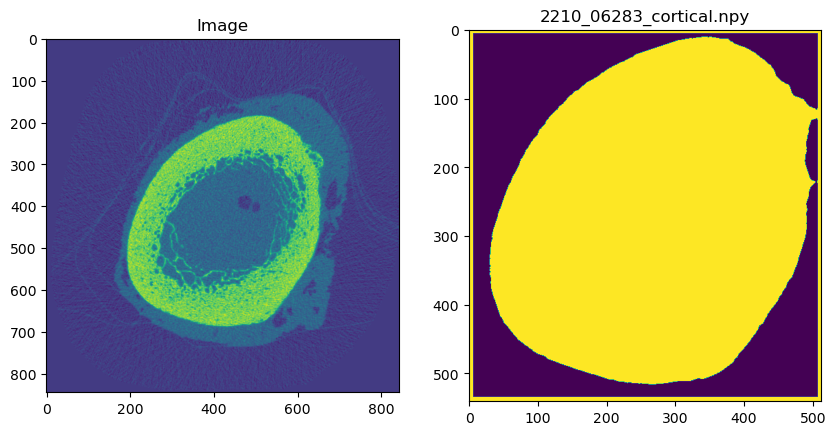

Shape mismatch: flowbone_2210_06283_r__p (149, 880, 688) (150, 1177, 1000) in mask 2210_06283_cortical.npy


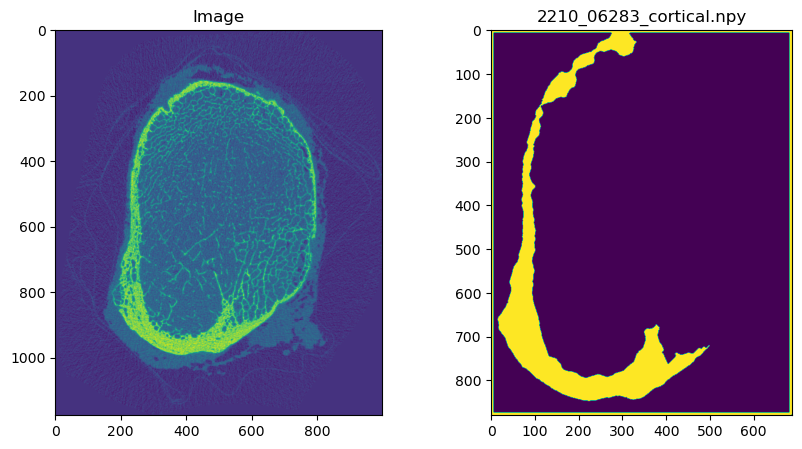

Shape mismatch: flowbone_2210_06492_l__p (142, 1156, 904) (150, 1722, 1066) in mask 2210_06492_cortical.npy


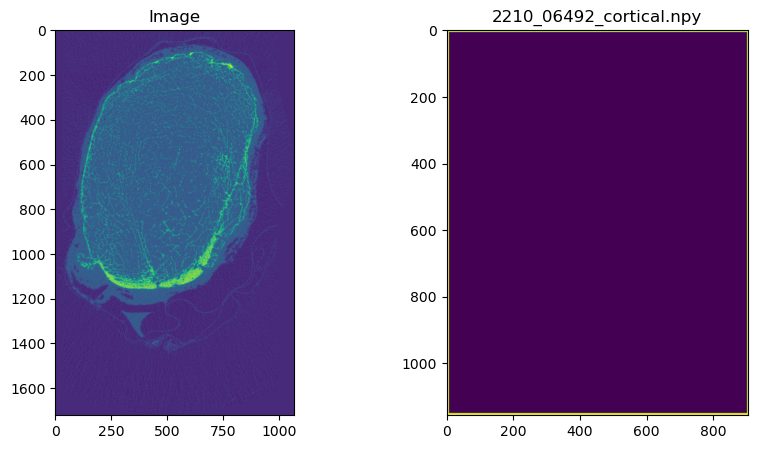

In [14]:
for folder in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder)) or folder.endswith("h"):
        continue
    sample = [sample for sample in os.listdir(os.path.join(data_folder, folder)) if sample.endswith("image.npy")][0]
    sample_arr = np.load(os.path.join(data_folder, folder, sample))



    if len([sample for sample in  os.listdir(os.path.join(data_folder, folder)) if "threshold" in sample]) > 0:
        print(f"Skipping {folder}")
        continue
    print(f"Processing {folder}")
    
    sample = sample.split("_")[:-1]
    sample = "_".join(sample)
    image = np.load(os.path.join(data_folder, folder, f"{sample}_image.npy"))
    trab_mask = create_trab_mask(image, None)
    np.save(os.path.join(data_folder, folder, f"{sample}_threshold.npy"), trab_mask)
